In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import glob
import os

In [2]:
anat_data = "/home/sabs-r3/Documents/02_Teaching/Brains-are-hard/data/sub-01/ses-retest/anat/sub-01_ses-retest_T1w.nii.gz"

motion = "/home/sabs-r3/Documents/02_Teaching/Brains-are-hard/data/sub-01/ses-retest/func/sub-01_ses-retest_task-fingerfootlips_bold.nii.gz"

In [68]:
data = load_imgs(motion)

data

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 9., 10.,  9., ..., 10.,  9.,  8.],
         [ 9.,  9.,  8., ...,  4.,  6.,  9.],
         [10.,  6.,  8., ...,  8.,  9.,  9.],
         ...,
         [13., 14., 12., ..., 14., 15.,  8.],
         [10., 12.,  4., ..., 13.,  9., 17.],
         [19., 16.,  9., ...,  8.,  8., 15.]],

        [[21., 28., 23., ..., 28., 29., 24.],
         [25., 27., 30., ..., 19., 22., 25.],
         [31., 22., 24., ..., 33., 27., 30.],
         ...,
         [28., 31., 26., ..., 28., 28., 19.],
         [17., 26., 25., ..., 24., 20., 34.],
         [31., 34., 26., ..., 26., 24., 24.]],

        ...,

        [[27., 22., 21., ..., 26., 23., 18.],
         [15., 21., 26., ..., 20., 17., 25.],
         [16., 21.

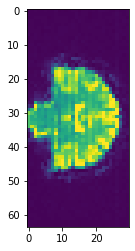

In [5]:
### data.shape

plt.imshow(data[:,30,:,0], vmax = 2000)

In [6]:
new_data = show_img_time(data[:,:,:,10:-6]) # 4 + 2
labels = get_labels()

print(labels.shape)
new_data.shape

(14, 3)


(14, 64, 30)

In [52]:
training = '/home/sabs-r3/Documents/02_Teaching/Brains-are-hard/dataformated/training/'
testing = '/home/sabs-r3/Documents/02_Teaching/Brains-are-hard/dataformated/testing/'

In [55]:
_data, _labels = get_data(testing)

np.savez('testing_data.npz', data=_data, labels=_labels)

npzfile = np.load('testing_data.npz')

print(npzfile['labels'].shape)
print(npzfile['data'].shape)

(56, 3)
(56, 64, 30, 4)


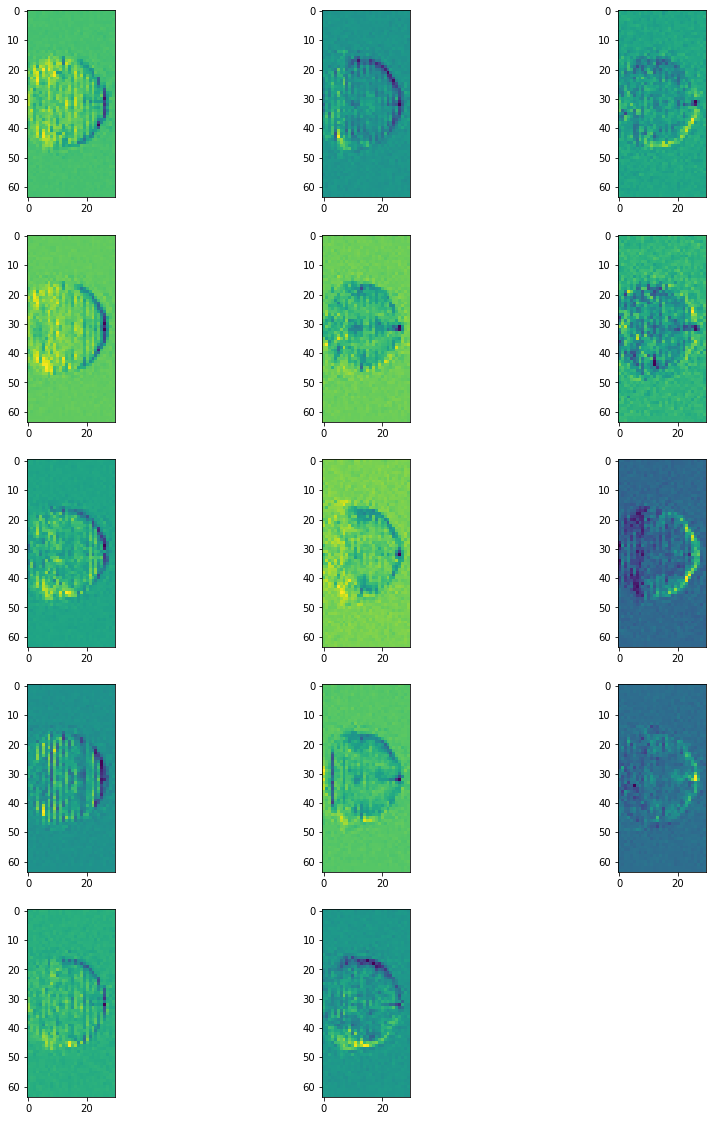

In [47]:
file = '/home/sabs-r3/Documents/02_Teaching/Brains-are-hard/dataformated/testing/sub-01_ses-retest_task-fingerfootlips_bold.nii.gz'
data = load_imgs(file)
new_data = plot_img_time(data[:,:,:,10:-6])

In [9]:
(4) - 6 - 2 - 4  - 6 - 2 - 4

8 - 12
9 - 13

20 - 24
21 - 25




movement = plt_data[:,:,i*12+2:i*12+5].mean(2)
non_move = plt_data[:,:,i*12+8:i*12+10].mean(2)

NameError: name 'plt_data' is not defined

In [ ]:
#for i in range(185): 
#    print(data[:,:,:,i].shape)
#    new = data[:,:,:,i].mean(axis=2)
#    print(new.shape)


new_data = np.array([data[:,:,:,i+1].mean(axis=2) for i in range(183)])

print(new_data.shape)

def show_img_time(data, time):
    
    plt.figure(3, figsize=(15,20))
    
    slize = 24
    
    plt.subplot(5,5,1)
    plt.imshow(data[time-75])
    plt.subplot(5,5,2)
    plt.imshow(data[time-37])
    plt.subplot(5,5,3)
    plt.imshow(data[time])
    plt.subplot(5,5,4)
    plt.imshow(data[time+37])
    plt.subplot(5,5,5)
    plt.imshow(data[time+75])


show_img_time(new_data, int(197.5/2.5))

In [ ]:
ani = animation.FuncAnimation(fig, update, len(a))
writer = animation.ImageMagickFileWriter(fps=5)
ani.save('anterior_posterior.gif', writer=writer) 

In [48]:
def show_img_time(data):
    
    #plt.figure(14, figsize=(15,20))
    
    plt_data = data[:,20:41,:,:].mean(1)
    
    
    split_data = np.array(np.split(plt_data, 14, axis=2))
    
    result = []
    
    for num, a_data in enumerate(split_data):
        
        # This is with a 10 second delay from movement to measurement
        movement = a_data[:,:,2:6]#.mean(2)
        non_move = a_data[:,:,8:12]#.mean(2)
        
        a_data = movement-non_move
        
        result.append(a_data)
        
        #plt.subplot(5,5,num+1)
        #plt.imshow(a_data, vmax = 100)
    
    return np.array(result)

file = '/home/sabs-r3/Documents/02_Teaching/Brains-are-hard/dataformated/testing/sub-01_ses-retest_task-fingerfootlips_bold.nii.gz'
data = load_imgs(file)
new_data = show_img_time(data[:,:,:,10:-6])
new_data

array([[[[-0.9047619 ,  1.33333333,  2.61904762,  1.04761905],
         [ 2.        , -0.19047619,  1.14285714,  1.52380952],
         [-1.42857143,  0.14285714,  5.23809524, -0.42857143],
         ...,
         [ 1.42857143,  1.        ,  1.28571429,  0.        ],
         [ 1.0952381 , -0.57142857,  3.28571429, -1.47619048],
         [ 1.19047619, -1.        , -0.52380952,  0.0952381 ]],

        [[-0.23809524,  1.14285714,  2.9047619 , -0.95238095],
         [ 0.28571429,  1.23809524, -1.33333333,  0.28571429],
         [ 0.9047619 ,  0.85714286,  0.9047619 , -0.38095238],
         ...,
         [-1.        ,  0.71428571,  0.76190476, -1.23809524],
         [-0.23809524, -0.71428571,  0.28571429, -1.38095238],
         [-0.66666667,  0.47619048, -0.38095238, -1.38095238]],

        [[-0.47619048, -2.80952381,  1.52380952, -1.38095238],
         [-0.19047619, -0.14285714,  0.23809524,  1.57142857],
         [-0.52380952,  0.04761905, -0.19047619,  2.0952381 ],
         ...,
         